In [2]:
# Bootstrap sys.path so 'from src...' works
import sys
from pathlib import Path

# If running from notebooks/, project root is parent
ROOT = Path.cwd() if (Path.cwd() / 'src').exists() else Path.cwd().parent
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))
print('Project root on sys.path:', sys.path[0])


Project root on sys.path: c:\Users\murth\Desktop\NLP\Code-Base\session01\lecture2\svdClassification


In [3]:
from pathlib import Path
import json, joblib
from src.utils import load_config
cfg = load_config()
root = Path.cwd() if (Path.cwd() / 'src').exists() else Path.cwd().parent
model_path = root / cfg['paths']['models_dir'] / 'svd_lr_pipeline.joblib'
labels_path = root / cfg['paths']['models_dir'] / 'target_names.json'
pipe = joblib.load(model_path)
target_names = json.load(open(labels_path, 'r', encoding='utf-8'))
print('Loaded pipeline from:', model_path)
print('Classes:', target_names)


Loaded pipeline from: c:\Users\murth\Desktop\NLP\Code-Base\session01\lecture2\svdClassification\models\svd_lr_pipeline.joblib
Classes: ['comp.graphics', 'rec.sport.hockey', 'sci.med', 'talk.politics.misc']


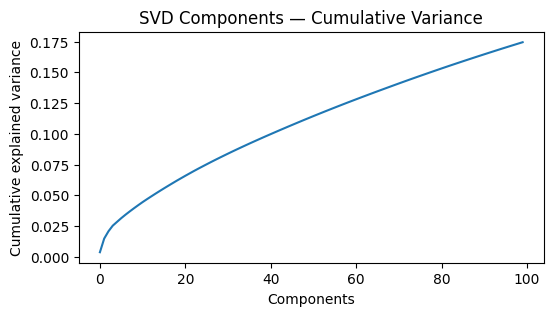

In [4]:
import matplotlib.pyplot as plt
import numpy as np
svd = pipe.named_steps['svd']
explained = svd.explained_variance_ratio_
plt.figure(figsize=(6,3))
plt.plot(np.cumsum(explained))
plt.xlabel('Components')
plt.ylabel('Cumulative explained variance')
plt.title('SVD Components — Cumulative Variance')
plt.show()


In [5]:
from src.preprocess import preprocess
samples = [
    "OpenGL shaders for texture mapping and rendering 3D graphics on a workstation",
    "The goalie made a brilliant save in the third period as the puck deflected",
    "Clinical trial shows improved outcomes; physicians observed fewer side effects",
    "Debate over public policy and election reforms dominates national politics"
]
preds = pipe.predict(preprocess(samples))
for s, i in zip(samples, preds):
    print(f"{s[:60]}... -> {target_names[int(i)]}")


OpenGL shaders for texture mapping and rendering 3D graphics... -> comp.graphics
The goalie made a brilliant save in the third period as the ... -> rec.sport.hockey
Clinical trial shows improved outcomes; physicians observed ... -> sci.med
Debate over public policy and election reforms dominates nat... -> talk.politics.misc
